In [10]:
import os
# 2x 2 chips (4 cores) per process:
os.environ["TPU_CHIPS_PER_HOST_BOUNDS"] = "1,2,1"
os.environ["TPU_HOST_BOUNDS"] = "1,1,1"
# Different per process:
os.environ["TPU_VISIBLE_DEVICES"] = "0,1" # Change to "2,3" for the second machine
# Pick a unique port per process
os.environ["TPU_MESH_CONTROLLER_ADDRESS"] = "localhost:8476"
os.environ["TPU_MESH_CONTROLLER_PORT"] = "8476"

print('done')

done


In [11]:
import jax
print(jax.devices())#

[TpuDevice(id=0, process_index=0, coords=(0,0,0), core_on_chip=0), TpuDevice(id=1, process_index=0, coords=(0,0,0), core_on_chip=1), TpuDevice(id=2, process_index=0, coords=(0,1,0), core_on_chip=0), TpuDevice(id=3, process_index=0, coords=(0,1,0), core_on_chip=1)]


In [ ]:
# Check that RNG works
# Context: https://github.com/google/jax/issues/7896
import jax
import jax.numpy as jnp

# sample from a Markov chain
init_dist = jnp.array([0.8, 0.2])
trans_mat = jnp.array([[0.9, 0.1], [0.5, 0.5]])
rng_key = jax.random.PRNGKey(0)
from jax.scipy.special import logit
seq_len = 15

initial_state = jax.random.categorical(rng_key, logits=logit(init_dist), shape=(1,))

def draw_state(prev_state, key):
        logits = logit(trans_mat[:, prev_state])
        state = jax.random.categorical(key, logits=logits.flatten(), shape=(1,))
        return state, state

        rng_key, rng_state, rng_obs = jax.random.split(rng_key, 3)
        keys = jax.random.split(rng_state, seq_len - 1)

        final_state, states = jax.lax.scan(draw_state, initial_state, keys)

        print(states)
            
rng_key, rng_state, rng_obs = jax.random.split(rng_key, 3)
keys = jax.random.split(rng_state, seq_len - 1)

final_state, states = jax.lax.scan(draw_state, initial_state, keys)

print(states)

In [13]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
%cd ~/base/project1/github

/mnt/disks/persist/project1/github


2283.890028194425
0.10012814134508047
3106.0904383444185
66429.90817920299
saving image to /mnt/disks/persist/project1/github/pyprobml/scripts/../figures/ab_profit.pdf
saving image to /mnt/disks/persist/project1/github/pyprobml/scripts/../figures/ab_profit.png


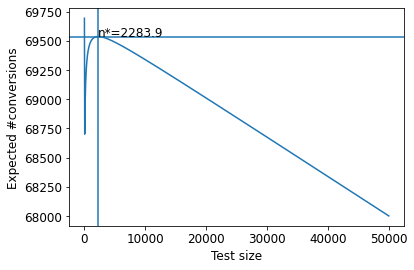

saving image to /mnt/disks/persist/project1/github/pyprobml/scripts/../figures/ab_error.pdf
saving image to /mnt/disks/persist/project1/github/pyprobml/scripts/../figures/ab_error.png


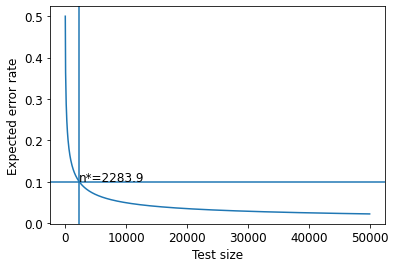

In [14]:
%run pyprobml/scripts/ab_test_demo.py

In [15]:
from jsl.demos import logreg_biclusters_demo as demo
figures, data = demo.main()
print(data)

RuntimeError: UNIMPLEMENTED: While rewriting computation to not contain X64 element types, XLA encountered an HLO for which this rewriting is not implemented: %bitcast-convert.277 = f64[3]{0} bitcast-convert(u64[3]{0} %or.276), metadata={op_type="bitcast_convert_type" op_name="jit(_multivariate_normal)/bitcast_convert_type[new_dtype=float64]" source_file="/mnt/disks/persist/project1/github/JSL/jsl/demos/logreg_biclusters_demo.py" source_line=73}

MCMC weights
[-1.70073    -0.99159336 -0.8605771 ]

Laplace weights
[-1.6733112  -0.92109627 -0.74142355]



RuntimeError: UNIMPLEMENTED: While rewriting computation to not contain X64 element types, XLA encountered an HLO for which this rewriting is not implemented: %bitcast-convert.277 = f64[3]{0} bitcast-convert(u64[3]{0} %or.276), metadata={op_type="bitcast_convert_type" op_name="jit(_multivariate_normal)/bitcast_convert_type[new_dtype=float64]" source_file="/mnt/disks/persist/project1/github/JSL/jsl/demos/logreg_biclusters_demo.py" source_line=73}

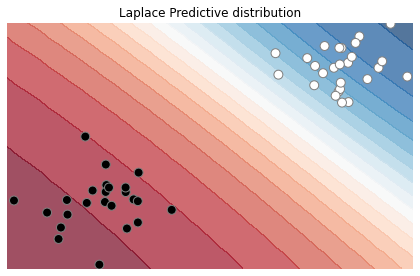

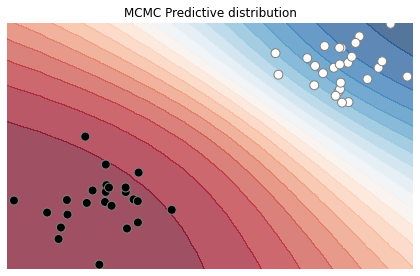

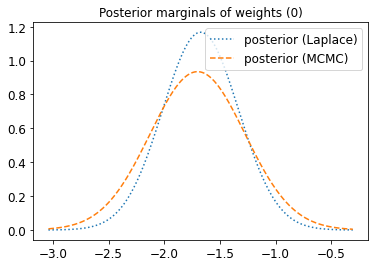

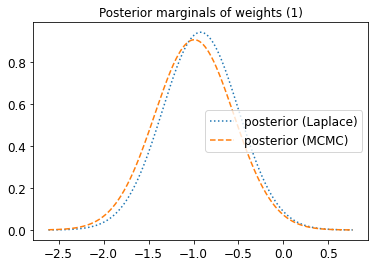

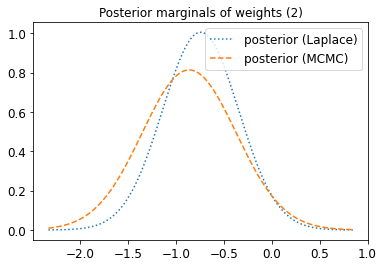

In [7]:
%run JSL/jsl/demos/eekf_logistic_regression_demo.py

In [16]:
%run JSL/jsl/demos/logreg_biclusters_demo.py

RuntimeError: UNIMPLEMENTED: While rewriting computation to not contain X64 element types, XLA encountered an HLO for which this rewriting is not implemented: %bitcast-convert.277 = f64[3]{0} bitcast-convert(u64[3]{0} %or.276), metadata={op_type="bitcast_convert_type" op_name="jit(_multivariate_normal)/bitcast_convert_type[new_dtype=float64]" source_file="/mnt/disks/persist/project1/github/JSL/jsl/demos/logreg_biclusters_demo.py" source_line=73}

saving image to /mnt/disks/persist/project1/github/pyprobml/scripts/../figures/ffvb_predictive_distribution.pdf
saving image to /mnt/disks/persist/project1/github/pyprobml/scripts/../figures/ffvb_predictive_distribution.png
saving image to /mnt/disks/persist/project1/github/pyprobml/scripts/../figures/ffvb_weights_marginals_0.pdf
saving image to /mnt/disks/persist/project1/github/pyprobml/scripts/../figures/ffvb_weights_marginals_0.png
saving image to /mnt/disks/persist/project1/github/pyprobml/scripts/../figures/ffvb_weights_marginals_1.pdf
saving image to /mnt/disks/persist/project1/github/pyprobml/scripts/../figures/ffvb_weights_marginals_1.png
saving image to /mnt/disks/persist/project1/github/pyprobml/scripts/../figures/ffvb_weights_marginals_2.pdf
saving image to /mnt/disks/persist/project1/github/pyprobml/scripts/../figures/ffvb_weights_marginals_2.png
FFVB weights
[-1.127439   -0.69480884 -0.67794997]



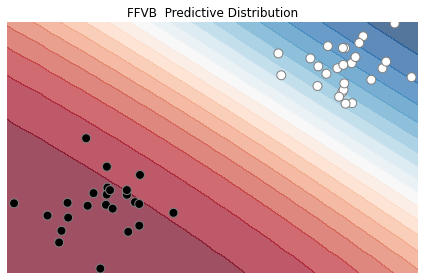

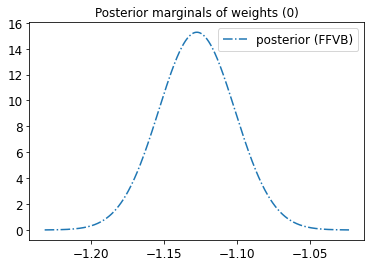

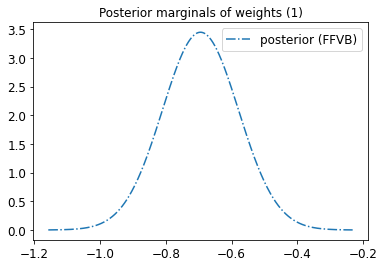

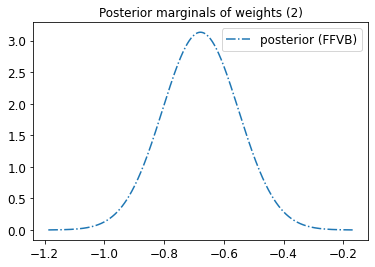

In [5]:
%run pyprobml/scripts/vb_gauss_cholesky_biclusters_demo.py

L2-filter: 3.2605
L2-smooth: 2.0507


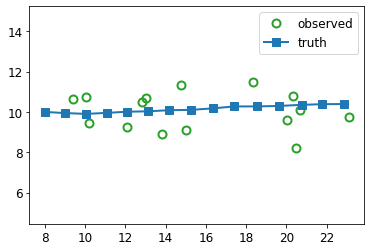

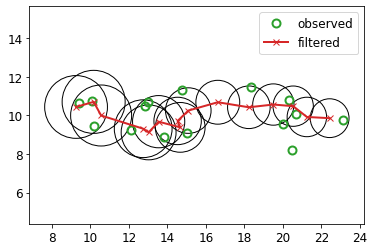

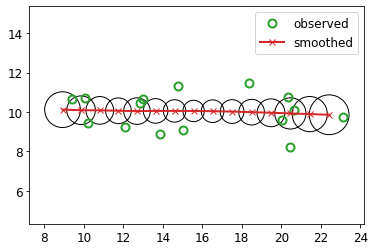

In [27]:
%run pyprobml/scripts/kf_tracking_demo.py